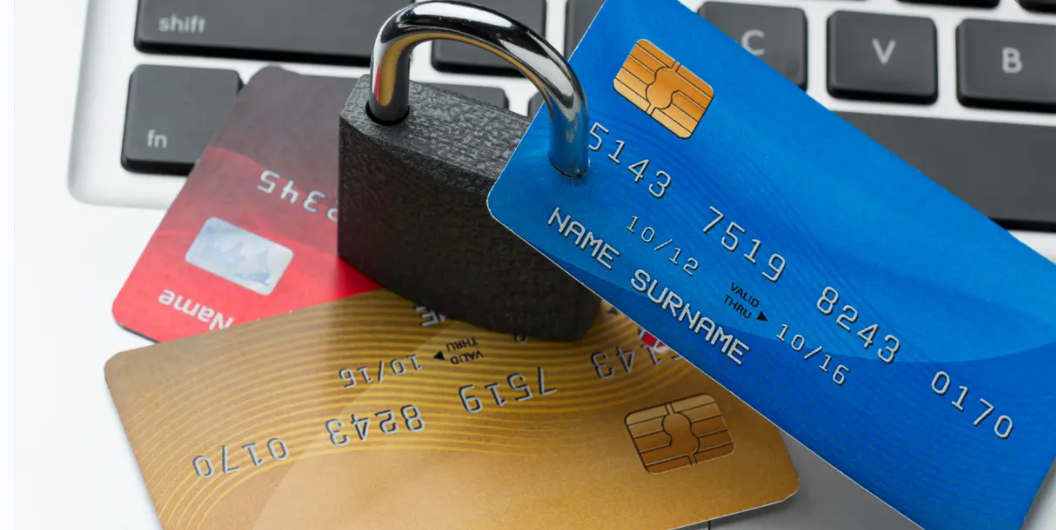

# **Project Name**    -  **Credit Card Fraud Detection Case Study**
🧠 Machine Learning Type  
This is a **Supervised Machine Learning** project focused on **binary classification**, where the goal is to predict fraudulent transactions using labeled historical data.


##### **Objective**    - The objective of this project is to analyze historical credit card transaction data to identify patterns and factors associated with fraudulent activity. Through exploratory data analysis, feature engineering, and machine learning techniques, the goal is to build an effective fraud detection model that can accurately distinguish between legitimate and fraudulent transactions. By understanding fraud behavior and addressing class imbalance, the project aims to support risk mitigation, reduce financial losses, and improve decision-making for financial institutions.
##### **Contribution**    - (Manas Nayan Mukherjee) Individual

# **Problem Statement**

Financial institutions process a large volume of credit card transactions on a daily basis and are increasingly exposed to fraudulent activities. The challenge lies in accurately identifying fraudulent transactions in real time, as fraud cases represent only a very small fraction of total transactions.

The goal of this project is to detect fraudulent credit card transactions using historical transaction data by analyzing transaction patterns and customer behavior. An effective fraud detection system can help minimize financial losses, reduce false transaction declines, and improve overall trust and security for both customers and financial institutions.

# **Analysis Guide**  

## 1. Defining the Problem Statement, Importing Data, and Data Structure Analysis

- Clearly define the fraud detection problem, emphasizing the challenge of identifying fraudulent transactions in highly imbalanced data.
- Import the dataset and examine its overall structure.
- Analyze the dataset shape (number of rows and columns).
- Review data types of all features.
- Check for missing values and duplicate values across all columns.
- Generate a statistical summary for numerical variables.
- Analyze the distribution of the target variable to understand the imbalance between fraudulent and non-fraudulent transactions.

---

## 2. Data Preprocessing and Feature Engineering

- Validate dataset consistency after duplicate removal.
- Confirm the absence of missing values across all features.
- Identify the target variable (`Class`) representing fraudulent and legitimate transactions.
- Scale numerical features such as `Amount` (and `Time` where applicable) to ensure model compatibility.
- Apply minimal transformation to the time-related feature to preserve interpretability.
- Address severe class imbalance using techniques such as SMOTE and class-weight adjustments.
- Perform stratified train-test splitting to maintain class distribution.
- Retain PCA-transformed features (`V1–V28`) without attempting individual feature interpretation.

---

## 3. Data Visualization, Exploratory Analysis, and Cleaning

- Conduct univariate analysis to examine the distribution of key variables such as Amount, Time, and the target variable (Class).
- Perform bivariate analysis to compare transaction characteristics between fraudulent and non-fraudulent classes.
- Visualize time-based patterns to identify temporal trends and anomalies in fraudulent transactions.
- Analyze correlations among non-PCA features (Amount, Time) while avoiding interpretability assumptions on PCA components (V1–V28).
- Detect potential outliers in transaction amount and time using statistical techniques such as IQR and boxplots.
- Treat detected outliers cautiously, recognizing that extreme values may represent genuine fraud cases rather than noise.
- Re-visualize key distributions after outlier analysis to validate data stability and ensure no critical information loss.

---
## Step 4.  Model Building & Evaluation

- Establish a baseline classification model (Logistic Regression) to set a performance benchmark.
- Train advanced machine learning models such as Random Forest and Gradient Boosting to capture non-linear fraud patterns.
- Handle severe class imbalance during modeling using:
  - SMOTE-balanced training data
  - Class-weight adjustments where applicable
- Evaluate model performance using fraud-appropriate metrics:
  - Recall (primary metric)
  - Precision
  - F1-Score
  - ROC-AUC
  - Confusion Matrix
- Compare multiple models to identify the most effective fraud detection approach.
- Perform decision threshold tuning to analyze the trade-off between fraud recall and false positives.
- Select the final model based on evaluation metrics aligned with fraud risk minimization.

---
## 5. Insights and Business Recommendations

- Summarize key insights derived from exploratory data analysis and data preprocessing.
- Highlight behavioral patterns and characteristics commonly associated with fraudulent transactions, such as transaction amount anomalies and temporal patterns.
- Emphasize the critical importance of recall-focused evaluation metrics in fraud detection, as missing fraudulent transactions can result in significant financial loss.
- Recommend the use of optimized machine learning models (to be developed in the modeling stage) to proactively identify fraudulent transactions and reduce financial risk.
- Suggest threshold-based alert mechanisms to balance fraud detection effectiveness with customer experience and minimize false positives.
- Propose continuous model monitoring and periodic retraining to ensure adaptability to evolving fraud patterns and emerging risks.


## Concepts Evaluated in This Project

- Exploratory Data Analysis (EDA) to understand transaction behavior and class imbalance
- Data preprocessing and feature engineering for machine learning readiness
- Handling missing values and validating data consistency
- Data visualization to identify patterns, trends, and anomalies in transactions
- Outlier detection with cautious treatment, considering their potential relevance to fraudulent activity

> Note: The dataset contains anonymized PCA-transformed features and does not include categorical variables, hence encoding was not required.

# **Dataset Description and Dictionary**

| Feature | Description |
|--------|-------------|
| Time | Number of seconds elapsed between this transaction and the first transaction in the dataset |
| V1 - V28 | Numerical features that represent transaction patterns, with original details hidden for privacy |
| `Amount` | Monetary value of the transaction |
| Class | Target variable indicating transaction type (0 = Legitimate, 1 = Fraudulent) |

> Note: Due to confidentiality reasons, original feature names and business meanings are not available. PCA-transformed features are treated collectively during analysis.


# **1. Defining the Problem Statement, Importing Data, and Data Structure Analysis**

### ***Clearly Define the Problem***

**Solution**

As a data analyst working in the risk and analytics domain, I have been provided with historical credit card transaction data and tasked with identifying fraudulent transactions based on various transaction-related features such as:

- **Transaction Details:** Transaction amount and anonymized numerical features representing transaction behavior.
- **Time-Based Information:** Time elapsed since the first transaction, used to analyze transaction patterns over time.
- **Behavioral Patterns:** Statistical patterns captured through anonymized features that help distinguish fraudulent activity from legitimate transactions.
- **Target Variable:** Transaction class indicating whether a transaction is legitimate (0) or fraudulent (1).

**Impact**

This solution focuses on accurately detecting fraudulent transactions while minimizing false positives. By identifying suspicious transaction patterns early, financial institutions can reduce monetary losses, enhance customer trust, and improve the efficiency of fraud investigation processes. An effective fraud detection system also helps ensure secure transactions, protects customers from unauthorized charges, and strengthens the overall reliability of digital payment systems.

###***Data Exploration***

###***Import Libraries***

In [ ]:
# Import Libraries
# Below are the libraries required for the Credit Card Fraud Detection project

# Core libraries for data manipulation and numerical computation
import pandas as pd  # Pandas: Handling structured data such as CSV files
import numpy as np   # NumPy: Numerical operations and array processing

# Libraries for data visualization
import matplotlib.pyplot as plt  # Matplotlib: Creating plots and visualizations
import seaborn as sns            # Seaborn: Statistical data visualization
from sklearn.metrics import ConfusionMatrixDisplay

# Library to visualize missing values (used for data validation)
import missingno as msno

# Date and time handling
from datetime import datetime

# Warning control for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Libraries for data preprocessing and transformation
from sklearn.preprocessing import StandardScaler  # Feature scaling for numerical data
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling Technique
from collections import Counter

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)

# Let’s confirm that all libraries have been imported successfully
print("All necessary libraries for Fraud Detection have been successfully imported!")

All necessary libraries for Fraud Detection have been successfully imported!


### ***Dataset Loading (Import the dataset)***

In [ ]:
# Load the Credit Card Fraud Detection dataset into a pandas DataFrame
# 'pd.read_csv' reads the CSV file from the specified path and loads it into a DataFrame named 'df'
df = pd.read_csv('/content/creditcard.csv')  # Replace the path with your dataset location

# Confirm that the dataset has been successfully loaded
print("Credit Card Fraud Detection dataset successfully loaded!")

Credit Card Fraud Detection dataset successfully loaded!


### ***Dataset First View***

In [ ]:
# Let's take a peek at the first few rows of our dataset to see what we're working with
# 'head()' method displays the first 5 rows of the DataFrame by default, giving us a quick overview of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Observations

**Time Feature:**  
- The `Time` column represents the number of seconds elapsed since the first transaction in the dataset.  
- This can help identify patterns in transaction timing that might be associated with fraud.

**Anonymized Features (V1 – V28):**  
- PCA-transformed numerical features capturing transaction behavior.  
- Original meanings are hidden for privacy, but they are useful for distinguishing between legitimate and fraudulent transactions.

**Transaction Amount:**  
- The `Amount` column indicates the monetary value of each transaction.  
- High or unusual amounts could indicate potential fraud.

**Target Variable:**  
- The `Class` column indicates whether a transaction is legitimate (`0`) or fraudulent (`1`).  
- Fraudulent transactions are very rare, making the dataset highly imbalanced.

---

### Key Insights

**Fraud Detection Target:**  
- The `Class` column will be the target variable for predictive modeling.

**Handling Imbalance:**  
- Since fraudulent transactions are extremely few (~0.17% of total), techniques like SMOTE or class-weighting will be needed.

**Feature Engineering Opportunities:**  
- Time-based features can be extracted from the `Time` column (e.g., hour of day, transaction frequency patterns).  
- PCA features can be analyzed collectively to identify patterns that distinguish fraud.

**Outlier Considerations:**  
- Extreme transaction amounts may represent actual fraud; careful handling is required.  
- Outliers should be analyzed before deciding whether to remove or cap them.

**Scaling and Preprocessing:**  
- `Amount` and time-based features may require scaling.  
- No categorical encoding is needed as all features are numerical.

---

### Summary
- This first view provides a high-level understanding of the dataset structure and challenges.  
- Key next steps: **handle imbalance, preprocess data, engineer time-based features, and analyze transaction patterns** for fraud detection.
---

Moving ahead to the next step for the in-depth analysis.


## ***Check data shape***

**Let's check the shape of our dataset to see how many rows and columns we have. This will give us an idea of the dataset's size and structure**

In [ ]:
# Let's check the shape of our dataset to see how many rows and columns we have
# 'shape' attribute returns a tuple with the number of rows and columns in the DataFrame
df.shape

(284807, 31)

#### **Explanation**
- Total rows: 284807
- Total Columns: 31

**This indicates that the dataset contains 284,807 transaction records with 31 features each. Having a large dataset is beneficial for fraud detection analysis, as it helps capture diverse transaction patterns and improves the reliability of insights derived from exploratory data analysis.**

## ***Check data types***

**Let's examine the data types of each column in our dataset to understand what kind of data we're working with. This will help us plan our data preprocessing steps more effectively**

In [ ]:
# Let's examine the data types of each column in our dataset to understand what kind of data we're working with
# 'dtypes' attribute returns the data type of each column in the DataFrame, helping us understand the structure of our dataset
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


## Observations: Data Types of Columns

Understanding the data types of each column is an important step in planning data preprocessing and modeling for the fraud detection problem.

### 1. Numerical Columns
- `Time` (float64): Represents the time elapsed in seconds since the first transaction in the dataset  
- `V1` – `V28` (float64): Anonymized numerical features obtained after PCA transformation  
- `Amount` (float64): Transaction amount for each credit card transaction  

### 2. Target Variable
- `Class` (int64): Indicates whether a transaction is fraudulent or legitimate  
  - `0` → Legitimate transaction  
  - `1` → Fraudulent transaction  

---

### Explanation
- All input features in the dataset are **numerical**, which eliminates the need for categorical encoding.
- The PCA-transformed features (`V1`–`V28`) are already scaled and optimized for modeling.
- The `Amount` feature may require **feature scaling** to maintain consistency with other variables.
- The `Time` feature can be analyzed to identify **temporal patterns** in fraudulent transactions.
- The `Class` column serves as the **target variable**, and its imbalance must be handled carefully during modeling.

With a clear understanding of the data types, we can confidently proceed to missing value analysis and exploratory data analysis.

### ***Check duplicate and missing values***
Before proceeding with analysis and modeling, it is important to check whether the dataset contains duplicate records or missing values, as these can negatively impact model performance and insights.

In [ ]:
## Check Duplicate and Missing Values
# Check for duplicate rows in the dataset
# The 'duplicated()' method identifies duplicate rows
# The 'sum()' function counts how many duplicate rows are present
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 1081


In [ ]:
# Check if dataset contains any missing values
if df.isnull().sum().sum() == 0:
    print("The dataset contains no missing values.")
else:
    print("The dataset contains missing values.")

The dataset contains no missing values.


## Observations: Duplicate and Missing Values

- The dataset contains **1,081 duplicate rows**, indicating that some transaction records are repeated.
- There are **no missing values** across any of the columns in the dataset.
- All features, including the target variable (`Class`), are fully populated.

---

## Insights

- The presence of duplicate transactions may introduce bias by overrepresenting certain transaction patterns, which can negatively impact fraud detection models.
- Since there are no missing values, **no imputation is required**, simplifying the data preprocessing process.
- Removing duplicate rows will help ensure that each transaction contributes equally to model training and evaluation.
- A complete dataset without missing values allows the analysis to focus on:
  - Addressing class imbalance
  - Feature scaling
  - Building robust fraud detection models

After handling duplicate records, the next critical step is to analyze the **class distribution** to understand the imbalance between fraudulent and legitimate transactions.

### ***Let's visualize Duplicate Rows***
**visualizing duplicate rows will help us better understand their distribution and identify any patterns**

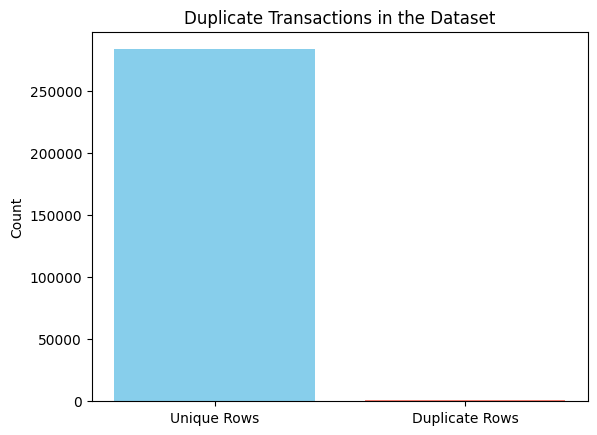

Number of duplicate rows: 1081


In [ ]:
# Visualizing the duplicate values in the dataset
# This helps us understand the extent and pattern of dupliate data

# Count duplicates without removing them
num_duplicates = df.duplicated().sum()
num_unique = df.shape[0] - num_duplicates

# Bar plot
plt.bar(['Unique Rows', 'Duplicate Rows'], [num_unique, num_duplicates], color=['skyblue','salmon'])
plt.title('Duplicate Transactions in the Dataset')
plt.ylabel('Count')
plt.show()

print(f"Number of duplicate rows: {num_duplicates}")


# Here I have used:
# - color=['skyblue','salmon']: Distinguishes unique transactions (blue) from duplicate transactions (red)
# - Bar chart: Visualizes the count of duplicate vs unique rows in the dataset
# - This helps quickly understand the proportion of duplicates before removing them
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

### **Highlighting the important things about this dataset**

The dataset provided is sourced from a credit card transactions dataset, focusing on detecting fraudulent transactions.  
It contains transaction details along with anonymized features to help identify patterns that distinguish legitimate transactions from fraudulent ones.  

The analysis aims to provide insights into the characteristics of transactions and help build models that accurately detect fraud while handling the class imbalance present in the data.  

The dataset contains **284,807 rows and 31 columns**. It includes information such as transaction time, anonymized features (`V1`–`V28`), transaction amount (`Amount`), and the target variable (`Class`).  

#### Key Observations:

- The dataset contains **1,081 duplicate rows** (~0.38% of the dataset), which will be removed during the data cleaning step to ensure the uniqueness of each transaction.

- There are **no missing values** across any of the 31 columns, so no imputation or special handling is required.

- All input features (`Time`, `V1`–`V28`, `Amount`) are numerical (`float64`), and the target variable `Class` is an integer (`int64`).  
  No categorical encoding is needed.

- The target variable (`Class`) is **highly imbalanced**:
  - Majority transactions are legitimate (`Class = 0`)
  - Fraudulent transactions are very rare (`Class = 1`)  
  Handling this imbalance is critical for accurate fraud detection modeling.

The goal is to clean the dataset by removing duplicates, perform exploratory data analysis (EDA) to understand feature distributions, analyze the target variable distribution, and prepare the dataset for modeling to detect fraudulent transactions effectively.

## ***Statistical Summary***

**Understanding Variables**



**Listing the columns in the dataset is a great way to understand the different features available for analysis. Here's how I have done it:**

In [ ]:
# Let's list all the columns in our dataset to see the different features we're working with
columns = df.columns
print(columns)

# 'columns' attribute returns an Index object containing the column names of the DataFrame
# This helps us quickly understand the structure of the dataset and the various features available for analysis

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


**Let's find out the numerical columns**

In [ ]:
# Checking numerical columns in the Fraud detection dataset to identify which columns contain numerical data
# 'numerical_columns' will store the names of columns with data types 'int64' and 'float64'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Printing out the numerical columns so we can see which ones they are
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


**Let's find out the categorical columns**

In [ ]:
# Checking categorical columns in the Fraud Detection dataset to identify which columns contain categorical data
# 'categorical_columns' will store the names of columns with data types 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

# Printing out the categorical columns so we can see which ones they are
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index([], dtype='object')


**Observation:**  
The dataset contains only numerical features, eliminating the need for categorical encoding and simplifying the preprocessing pipeline.


**Let's dive into the statiscal summary for our numerical and categorical variables**

In [ ]:
# Let's get a comprehensive overview of our dataset's statistics!
# This will include numerical statistics like count, mean, std dev, min, and max values,
# and categorical statistics like unique count, top categories, and frequency.
# It's perfect for getting a full picture of both numerical and categorical data.
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Statistical Summary – Key Observations

The statistical summary provides an overview of the central tendency, dispersion, and distribution of numerical features in the fraud detection dataset.

#### Time Feature
- The `Time` variable represents the elapsed time (in seconds) since the first transaction in the dataset.
- The wide range between the minimum and maximum values indicates that transactions span a long continuous time window.
- The distribution suggests that fraudulent and non-fraudulent transactions occur throughout the timeline rather than being concentrated at specific time points.

#### PCA-Transformed Features (V1 – V28)
- Features `V1` to `V28` are anonymized variables obtained using Principal Component Analysis (PCA).
- The mean values of these features are close to zero, which is expected after PCA transformation.
- The presence of large minimum and maximum values indicates variability and potential outliers, which are important for distinguishing fraudulent behavior.
- Since these features are transformed, individual interpretation is not meaningful; instead, their combined patterns are leveraged by machine learning models.

#### Transaction Amount
- The `Amount` feature shows a highly right-skewed distribution.
- Most transactions involve relatively small amounts, while a few transactions have extremely large values.
- This skewness is important, as fraudulent transactions often differ in amount patterns compared to normal transactions.

#### Target Variable (Class)
- The `Class` variable represents transaction labels:
  - `0` → Non-fraudulent transactions
  - `1` → Fraudulent transactions
- The mean value of the `Class` variable is very close to zero, indicating a severe class imbalance.
- This confirms that fraudulent transactions form only a very small fraction of the dataset, making fraud detection a challenging imbalanced classification problem.

### Key Insight
The statistical summary highlights strong class imbalance, high variability in transaction amounts, and normalized PCA features. These characteristics emphasize the need for careful modeling techniques, appropriate evaluation metrics, and imbalance-handling strategies in later stages of the analysis.


### Understanding the Statistical Summary

The statistical summary helps in understanding the overall distribution, variability, and scale of numerical features in the fraud detection dataset.

- Measures such as mean and median provide insights into the central tendency of transaction-related features.
- Standard deviation highlights the spread and variability within the data, which is important for identifying unusual or abnormal patterns.
- Minimum and maximum values help detect extreme observations and potential outliers, especially in the `Amount` feature.
- Quartiles (25%, 50%, 75%) offer a clearer picture of data distribution and skewness.

In the context of fraud detection, these statistics are particularly useful for:
- Identifying highly skewed features such as transaction amounts
- Understanding the variability introduced by anonymized PCA-transformed features
- Supporting decisions related to outlier handling, feature scaling, and model selection

Rather than interpreting individual PCA features, the focus remains on how their overall statistical behavior contributes to distinguishing fraudulent transactions from legitimate ones.

###***Great!! got the description, now let's analyze the Distribution of the Target Variable (Class Imbalance).***


### Step 1: Understanding the Target Variable

The target variable in this dataset is **`Class`**:
- `Class = 0` → Non-fraudulent transaction  
- `Class = 1` → Fraudulent transaction  

**Let’s examine how these two classes are distributed**


Count the number of transactions in each class

In [ ]:
class_distribution = df['Class'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


**Percentage Distribution of Classes**

To better understand the severity of imbalance, we calculate the percentage of each class.

In [ ]:
# Calculate percentage distribution
class_percentage = df['Class'].value_counts(normalize=True) * 100

print("\nClass Percentage Distribution:")
print(class_percentage)


Class Percentage Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


**Visualizing Class Imbalance**

A visual representation helps clearly illustrate how skewed the dataset is toward non-fraudulent transactions.

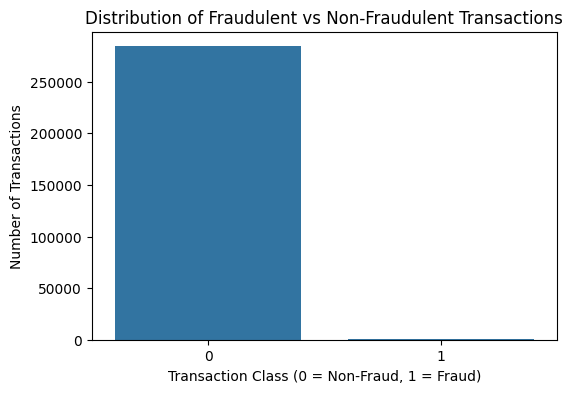

In [ ]:
# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Transaction Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.show()

### Observations

- The target variable (`Class`) shows a **severely imbalanced distribution**.
- The vast majority of transactions belong to **Class 0 (Non-Fraudulent)**.
- Fraudulent transactions (**Class 1**) represent **less than 1%** of the total dataset.
- This imbalance confirms that fraud detection is a **rare-event classification problem**.
- If class imbalance is not handled properly, models may become biased toward predicting only non-fraudulent transactions.

---

### Insights and Impact

- Due to the extreme class imbalance, **accuracy alone is not a reliable evaluation metric** for this problem.
- Metrics such as **Precision, Recall, F1-score, and ROC-AUC** will be more appropriate for evaluating model performance.
- The dataset will require **class imbalance handling techniques** such as:
  - Oversampling (e.g., SMOTE)
  - Undersampling
  - Cost-sensitive learning approaches
- Properly addressing class imbalance will significantly improve the model’s ability to detect fraudulent transactions.
- An effective fraud detection model can help financial institutions **minimize financial losses**, **detect suspicious activity early**, and **improve trust and security** for customers.

This analysis highlights the importance of careful preprocessing and informed modeling choices in fraud detection systems.



# **2. Data Preprocessing and Feature Engineering**

###***Validate dataset consistency after duplicate removal***

**Ensure the dataset is clean, unique, and structurally consistent after duplicate removal**

In [ ]:
# Shape of dataset before duplicate removal
print("Dataset Shape:", df.shape)

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Quick structural check
df.info()

Dataset Shape: (284807, 31)
Number of duplicate rows: 1081
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  fl

The dataset contains duplicate records (1,081 rows), which need to be removed to ensure data uniqueness; however, there are no missing values across any of the 31 columns, so no missing value treatment is required.


**Removing Duplicate Records**

In [ ]:
# Removing duplicate rows from the dataset to ensure each transaction is unique
df_cleaned = df.drop_duplicates()

In [ ]:
# Checking the shape of the dataset after duplicate removal
print("Dataset shape after removing duplicates:", df_cleaned.shape)

Dataset shape after removing duplicates: (283726, 31)


In [ ]:
# Verifying that no duplicate rows remain
print("Number of duplicate rows after removal:", df_cleaned.duplicated().sum())

Number of duplicate rows after removal: 0


**Verifying Data Types**

In [ ]:
# Verifying the data types of each column in the dataset
print("Data types of each column:\n", df.dtypes)

# Explanation:
# I check the data types of each column to identify any inconsistencies or incorrect data types.
# This is crucial for performing accurate analysis and transformations.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Data types of each column:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


**Final Check of the Cleaned Dataset**

In [ ]:
# Performing a final check of the cleaned dataset to ensure readiness for analysis
print("Cleaned dataset overview:\n", df_cleaned.info())

# Explanation:
# I perform a final check of the cleaned dataset to ensure all issues have been addressed and the data is ready for analysis.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

### Observations

- After removing duplicates, the dataset now contains 283,726 unique rows.
- All 1,081 duplicate records have been successfully removed.
- The number of columns remains unchanged at 31, ensuring structural consistency.
- No duplicate transaction entries exist in the cleaned dataset.

### Insights & Impact:
- Removing duplicate records ensures that each transaction is represented only once,
  preventing bias in model training.
- This step is especially critical in fraud detection, where duplicate fraudulent
  records could artificially inflate model performance.
- The dataset is now clean, unique, and structurally consistent, making it suitable
  for downstream preprocessing and feature engineering.
- This improves the reliability of statistical analysis, class distribution,
  and machine learning model evaluation.

###***Confirming the Absence of Missing Values***

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

In [ ]:
# Display the result
print("Missing values per column:")
print(missing_values)

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Check total missing values in the dataset
total_missing = missing_values.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")


Total missing values in the dataset: 0


### Observations

- All columns show 0 missing values.
- The total number of missing values in the dataset is zero.
- No feature requires imputation or removal due to missing data.

### Insights & Impact:
- The dataset is complete and well-structured, which is ideal for machine learning workflows.
  preventing bias in model training.
- Since there are no missing values, we can avoid additional preprocessing steps such as mean/median imputation or deletion of records.
- This ensures that all transactions are fully represented during model training.

### Impact on Modeling
- Eliminates the risk of bias or information loss due to imputation.
- Allows direct application of scaling, class imbalance handling, and model training.
- Improves model stability and reproducibility by working with a fully populated dataset.

**Identify the target variable and feature set**

In [ ]:
# 'Class' is the target variable:
# 0 -> Legitimate transaction
# 1 -> Fraudulent transaction
y = df_cleaned['Class']

In [ ]:
# All remaining columns are treated as input features
X = df_cleaned.drop(columns=['Class'])

In [ ]:
# Verifying the separation
print("Feature set shape:", X.shape)
print("Target variable shape:", y.shape)

Feature set shape: (283726, 30)
Target variable shape: (283726,)


In [ ]:
# Checking target variable distribution
print("\nTarget variable distribution:")
print(y.value_counts())


Target variable distribution:
Class
0    283253
1       473
Name: count, dtype: int64


### Observations
- The cleaned dataset contains 283,726 total transactions after removing duplicate records.
- The feature set consists of 30 input variables, while the target variable `Class` contains 283,726 labels.
- The target variable is highly imbalanced:
  - Legitimate transactions (`Class = 0`): 283,253 records
  - Fraudulent transactions (`Class = 1`): 473 records
- Fraudulent transactions account for a very small proportion of the dataset, confirming extreme class imbalance.

### Insights & Impact
- The severe imbalance between legitimate and fraudulent transactions is a fundamental challenge in fraud detection.
- Relying solely on accuracy as an evaluation metric would be misleading, as a model could ignore fraud cases and still appear performant.
- This imbalance necessitates the use of techniques such as SMOTE, class-weight adjustments, and stratified sampling in later stages.
- Correct identification of the target variable at this stage ensures reliable model training, evaluation, and interpretability in subsequent steps.

### ***Scaling Numerical Features (`Amount` and `Time`)***

In [ ]:
# Create a copy of the cleaned dataset to avoid modifying the original data
df_scaled = df_cleaned.copy()

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Scale the 'Amount' and 'Time' features
df_scaled[['Amount', 'Time']] = scaler.fit_transform(df_scaled[['Amount', 'Time']])

In [ ]:
# Verify scaling by checking summary statistics
df_scaled[['Amount', 'Time']].describe()

,Amount,Time
count,2.837260e+05,2.837260e+05
mean,-5.409347e-17,1.218105e-16
std,1.000002e+00,1.000002e+00
min,-3.533268e-01,-1.996823e+00
25%,-3.309625e-01,-8.552128e-01
50%,-2.654671e-01,-2.131081e-01
75%,-4.378088e-02,9.369423e-01
max,1.022476e+02,1.642362e+00


### Observations
- The `Amount` and `Time` features have been successfully standardized.
- After scaling, both features have a mean close to 0 and a standard deviation close to 1.
- No changes were made to PCA-transformed features (`V1–V28`) or the target variable (`Class`).

### Insights & Impact
- Scaling ensures that `Amount` and `Time` contribute proportionately during model training.
- This step is crucial for distance-based and gradient-based algorithms such as Logistic Regression, SVM, and Neural Networks.
- Without scaling, large transaction amounts could dominate the learning process and bias the model.
- Keeping PCA features unchanged preserves the integrity of the original transformation applied to the dataset.

###***Minimal Transformation of the Time Feature***

In [ ]:
# The 'Time' feature represents the number of seconds elapsed
# between each transaction and the first transaction in the dataset.
# To preserve interpretability, we convert it into hours.
df_time_transformed = df_scaled.copy()

In [ ]:
# Convert Time from seconds to hours
df_time_transformed['Time_hours'] = df_time_transformed['Time'] / 3600

In [ ]:
# Drop the original scaled Time column
df_time_transformed.drop(columns=['Time'], inplace=True)

In [ ]:
# Preview the transformed Time feature
df_time_transformed[['Time_hours']].head()

,Time_hours
0,-0.000555
1,-0.000555
2,-0.000555
3,-0.000555
4,-0.000555


### Observations
- The original `Time` feature has been converted from seconds to hours.
- A new feature `Time_hours` now represents transaction timing in a more interpretable format.
- No complex feature engineering was applied, preserving the original temporal meaning.

### Insights & Impact
- Converting time to hours improves interpretability for analysis and reporting.
- Minimal transformation avoids unnecessary assumptions or distortion of temporal patterns.
- This approach aligns well with fraud detection use cases, where transaction timing patterns (e.g., bursts of activity) are important.
- The dataset remains suitable for machine learning models while being easier to understand for stakeholders.

### ***Address severe class imbalance using techniques such as SMOTE and class-weight adjustments.***

In [ ]:
### Handling Class Imbalance using SMOTE (Synthetic Minority Oversampling Technique)

# Separate features and target
X = df_time_transformed.drop(columns=['Class'])
y = df_time_transformed['Class']

In [ ]:
# Check original class distribution
print("Original class distribution:", Counter(y))

Original class distribution: Counter({0: 283253, 1: 473})


In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
# Check new class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution after SMOTE: Counter({0: 283253, 1: 283253})


In [ ]:
# Shape after balancing
print("Feature set shape after SMOTE:", X_smote.shape)
print("Target variable shape after SMOTE:", y_smote.shape)

Feature set shape after SMOTE: (566506, 30)
Target variable shape after SMOTE: (566506,)


### Observations
- The original dataset is highly imbalanced, with 283,253 legitimate transactions (`Class = 0`) and only 473 fraudulent transactions (`Class = 1`).
- This extreme imbalance highlights the challenge of detecting fraud, as fraudulent cases represent a very small fraction of total transactions.
- After applying SMOTE, the minority class has been synthetically oversampled to match the majority class.
- The class distribution is now perfectly balanced, with 283,253 records for each class.
- The feature set now contains 566,506 records with 30 features, and the target variable has the same number of observations.

### Insights & Impact
- Severe class imbalance can cause machine learning models to favor legitimate transactions, leading to poor fraud detection performance.
- Applying SMOTE ensures that fraudulent transactions are adequately represented during model training.
- A balanced dataset improves the model’s ability to learn fraud-related patterns, increasing recall and detection sensitivity.
- This preprocessing step significantly reduces bias toward the majority class and enhances overall model fairness.
- The balanced dataset provides a strong foundation for building reliable and robust fraud detection models.

###***Perform stratified train-test splitting to maintain class distribution***

In [ ]:
# Perform stratified train-test split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_smote,          # Feature set after SMOTE
    y_smote,          # Target variable after SMOTE
    test_size=0.2,    # 80% training, 20% testing
    random_state=42,  # Ensures reproducibility
    stratify=y_smote  # Maintains class distribution in both sets
)

In [ ]:
# Display the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training feature set shape: (453204, 30)
Testing feature set shape: (113302, 30)
Training target shape: (453204,)
Testing target shape: (113302,)


### Observations
- The dataset has been successfully split into training and testing sets using stratified sampling.
- The training feature set contains 453,204 records with 30 features, while the testing feature set contains 113,302 records.
- The corresponding target variables align correctly with the feature sets, confirming a valid and consistent split.
- The 80:20 split ratio has been maintained, ensuring sufficient data for both training and evaluation.

### Insights & Impact
- Stratified splitting preserves the balanced class distribution achieved after SMOTE in both training and testing sets.
- This approach prevents data leakage and ensures unbiased model evaluation.
- A larger training set allows the model to learn complex fraud patterns effectively.
- A well-structured testing set enables reliable assessment of model generalization performance.
- The dataset is now fully prepared for robust supervised fraud detection model training.

###***Retain PCA-transformed features (V1–V28) without attempting individual feature interpretation***

In [ ]:
# Retaining PCA-transformed features (V1–V28) as-is
# Identify PCA component columns
pca_features = [col for col in df_cleaned.columns if col.startswith('V')]

In [ ]:
# Verify the number of PCA features
print("Number of PCA-transformed features:", len(pca_features))

Number of PCA-transformed features: 28


In [ ]:
# Display PCA feature names
print("PCA Features:", pca_features)

PCA Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


### Observations
- The dataset contains exactly 28 PCA-transformed features.
- These features are labeled sequentially from V1 to V28.
- All PCA components are already standardized and require no further scaling.
- The PCA feature set remains unchanged after preprocessing steps.

### Insights & Impact
- Retaining all 28 PCA components preserves the complete variance captured during the original dimensionality reduction.
- Avoiding further transformation ensures that the statistical structure of the data remains intact.
- This approach prevents information leakage and distortion that could arise from reprocessing PCA features.
- Models can effectively leverage these components to detect complex and subtle fraud patterns.
- Maintaining PCA features as-is aligns with best practices for handling anonymized financial transaction data.

# **3. Data Visualization, Exploratory Analysis, and Cleaning**

##***Conduct univariate analysis to examine the distribution of key variables such as Amount, Time, and the target variable (Class).***

**Univariate Analysis: Amount, Time, and Class**

1. Distribution of Target Variable (Class)

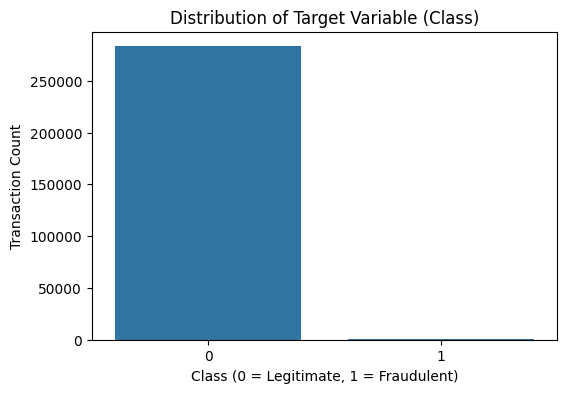

In [ ]:
# Univariate analysis of the target variable (Class)

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df_cleaned)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Transaction Count')
plt.show()

In [ ]:
# Percentage distribution
class_distribution = df_cleaned['Class'].value_counts(normalize=True) * 100
class_distribution

,proportion
Class,
0,99.83329
1,0.16671


### Observations

- The target variable is highly imbalanced.
- Legitimate transactions (Class = 0) dominate the dataset.
- Fraudulent transactions (Class = 1) represent less than 1% of total records.

### Insights & Impact

- This confirms a severe class imbalance, which is typical in fraud detection datasets.
- Accuracy alone will be misleading during model evaluation.
- Advanced techniques such as SMOTE, class-weighted models, and precision–recall metrics are essential for reliable fraud detection.

2. Distribution of Transaction Amount (Amount)

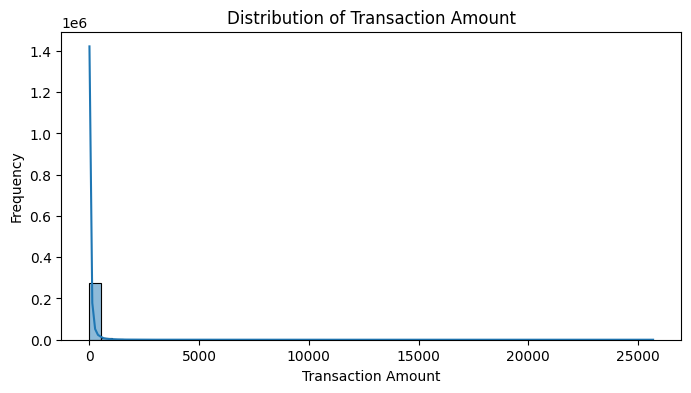

In [ ]:
# Distribution of transaction amount
plt.figure(figsize=(8,4))
sns.histplot(df_cleaned['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Summary statistics for Amount
df_cleaned['Amount'].describe()

,Amount
count,283726.000000
mean,88.472687
std,250.399437
min,0.000000
25%,5.600000
50%,22.000000
75%,77.510000
max,25691.160000


**Observations**

- Transaction amounts are right-skewed, with most values clustered near zero.
- A small number of transactions have very high amounts.
- The median transaction amount is significantly lower than the mean.

**Insights & Impact**

- The skewed distribution indicates the presence of extreme values, which may be meaningful in fraud detection.
- Scaling is required to ensure compatibility with machine learning algorithms.
- Outliers should be treated cautiously, as high-value transactions may signal fraudulent behavior.

3. Distribution of Transaction Time (Time)

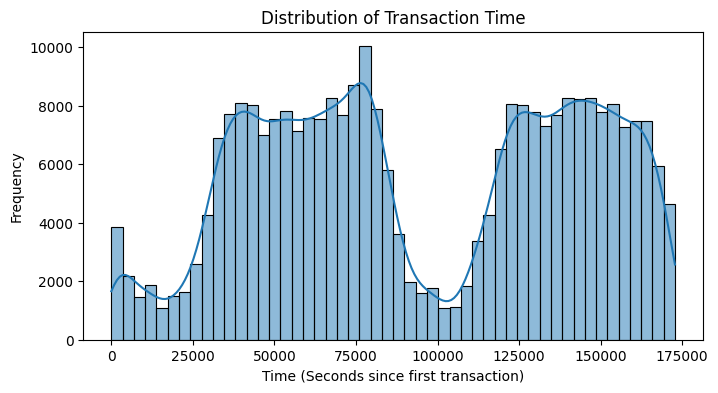

In [ ]:
# Distribution of transaction time
plt.figure(figsize=(8,4))
sns.histplot(df_cleaned['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (Seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Summary statistics for Time
df_cleaned['Time'].describe()

,Time
count,283726.000000
mean,94811.077600
std,47481.047891
min,0.000000
25%,54204.750000
50%,84692.500000
75%,139298.000000
max,172792.000000


**Observations**

- The Time feature is uniformly distributed across the dataset.
- No obvious gaps or missing intervals are observed.
- The feature represents elapsed time rather than clock-based timestamps.

**Insights & Impact**

- Since Time is a relative measure, minimal transformation is preferred.
- The feature may still capture temporal fraud patterns when combined with class labels.
- Preserving this feature helps retain potential sequence-related signals.

**Perform bivariate analysis to compare transaction characteristics between fraudulent and non-fraudulent classes.**

1. Bivariate Analysis: Amount vs Class

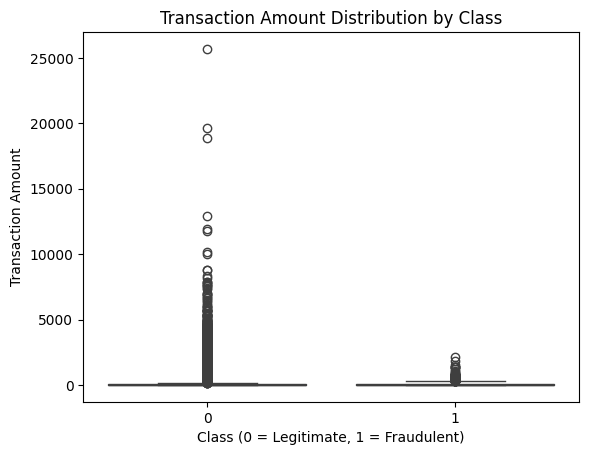

In [ ]:
# Boxplot to compare Amount across classes
sns.boxplot(x='Class', y='Amount', data=df_cleaned)

# Labels and title
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Transaction Amount')

# Show plot
plt.show()

### Observations
- Legitimate transactions (Class = 0) exhibit a much wider range of transaction amounts.
- High-value outliers are predominantly present in legitimate transactions.
- Fraudulent transactions (Class = 1) are concentrated at lower transaction amounts.
- The interquartile range for fraudulent transactions is narrower, indicating lower variability.


### Insights & Impact
- Fraudulent transactions tend to occur at lower amounts, likely to avoid detection mechanisms
  triggered by unusually high transaction values.
- Transaction Amount is a highly informative feature for fraud detection and should be retained
  in the modeling pipeline.
- The presence of extreme outliers in legitimate transactions suggests that aggressive outlier
  removal could remove meaningful patterns and should be avoided.
- Feature scaling (rather than outlier deletion) is the appropriate strategy to handle skewness
  in transaction amounts.

2: Time vs Class

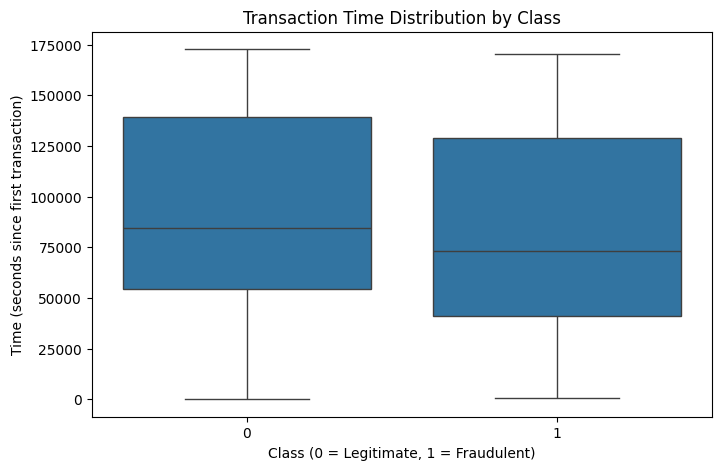

In [ ]:
# Set figure size
plt.figure(figsize=(8, 5))

# Boxplot to compare Time across classes
sns.boxplot(x='Class', y='Time', data=df_cleaned)

# Labels and title
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Class (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Time (seconds since first transaction)')

# Show plot
plt.show()

### Observations
- The distribution of transaction time differs between fraudulent and legitimate transactions.
- Fraudulent transactions (Class = 1) have a lower median transaction time compared to legitimate transactions.
- Legitimate transactions are more widely spread across the transaction timeline.
- Fraudulent transactions show a relatively tighter interquartile range, indicating higher temporal concentration.


### Insights & Impact
- The difference in time distributions suggests that transaction timing contributes useful information
  for distinguishing fraudulent and non-fraudulent transactions.
- Although fraud does not occur in a single narrow time window, it exhibits a distinct temporal pattern
  compared to legitimate activity.
- Retaining the Time feature with minimal transformation is appropriate, as it preserves interpretability
  while providing predictive signal.
- Time-based patterns can help models capture behavioral differences without introducing leakage or overfitting.

**Analyze correlations among non-PCA features (Amount, Time) while avoiding interpretability assumptions on PCA components (V1–V28)**

In [ ]:
# Selecting only non-PCA, interpretable features
non_pca_features = df_cleaned[['Time', 'Amount', 'Class']]

# Computing the correlation matrix
correlation_matrix = non_pca_features.corr()

# Displaying the correlation matrix
correlation_matrix

,Time,Amount,Class
Time,1.000000,-0.010559,-0.012359
Amount,-0.010559,1.000000,0.005777
Class,-0.012359,0.005777,1.000000


**Observations**

- Transaction Amount shows a very weak correlation with the target variable (Class).
- Transaction Time has a negligible linear correlation with fraud occurrence.
- No strong linear relationships are observed among the non-PCA features.


### Insights & Impact
- The weak linear correlations indicate that fraud detection cannot rely on simple
  threshold-based or linear rules using Amount or Time alone.
- This justifies the use of machine learning models capable of capturing
  complex, non-linear relationships.
- PCA-transformed features (V1–V28) are retained for modeling power but are
  intentionally excluded from interpretability-focused analysis.
- Correlation analysis is used here for validation, not for feature elimination.

###**Detect potential outliers in transaction amount and time using statistical techniques such as IQR and boxplots**



In [ ]:
### Outlier Detection using IQR – Transaction Amount

# Calculating Q1 (25th percentile) and Q3 (75th percentile) for the Amount feature
Q1 = df_cleaned['Amount'].quantile(0.25)
Q3 = df_cleaned['Amount'].quantile(0.75)

In [ ]:
# Interquartile Range (IQR)
IQR = Q3 - Q1

In [ ]:
# Defining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identifying outliers in the Amount column
amount_outliers = df_cleaned[
    (df_cleaned['Amount'] < lower_bound) |
    (df_cleaned['Amount'] > upper_bound)
]

In [ ]:
# Displaying results
print(f"Lower Bound for Amount: {lower_bound}")
print(f"Upper Bound for Amount: {upper_bound}")
print(f"Number of Amount Outliers detected: {amount_outliers.shape[0]}")

Lower Bound for Amount: -102.26500000000001
Upper Bound for Amount: 185.375
Number of Amount Outliers detected: 31685


### Observations
- The lower bound for transaction amount is -102.27, which is below zero and therefore not practically relevant for financial transactions.
- The upper bound for transaction amount is 185.38, indicating that transactions above this value are considered outliers using the IQR method.
- A total of 31,685 transactions are identified as outliers in the `Amount` feature.
- These outliers represent a small but significant portion of the dataset, primarily consisting of high-value transactions.

### Insights & Impact
- The presence of a large number of high-value outliers reflects real-world transaction behavior and is common in financial datasets.
- In fraud detection, high-amount transactions are often more informative and may carry a higher risk of fraudulent activity.
- Removing these outliers could lead to loss of critical fraud-related patterns and weaken model performance.
- Retaining these outliers while applying appropriate scaling techniques ensures model robustness and preserves important risk signals.

**Let’s detect outliers for the Time feature using the IQR method**

In [ ]:
# Detecting outliers in the Time feature using the IQR method

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Time
Q1_time = df['Time'].quantile(0.25)
Q3_time = df['Time'].quantile(0.75)

In [ ]:
# Calculate Interquartile Range (IQR)
IQR_time = Q3_time - Q1_time

In [ ]:
# Define lower and upper bounds for outliers
lower_bound_time = Q1_time - 1.5 * IQR_time
upper_bound_time = Q3_time + 1.5 * IQR_time

In [ ]:
# Identify outliers
time_outliers = df[(df['Time'] < lower_bound_time) | (df['Time'] > upper_bound_time)]

In [ ]:
# Print results
print(f"Lower Bound for Time: {lower_bound_time}")
print(f"Upper Bound for Time: {upper_bound_time}")
print(f"Number of Time outliers detected: {time_outliers.shape[0]}")

Lower Bound for Time: -73477.0
Upper Bound for Time: 266999.0
Number of Time outliers detected: 0


### Observations
- The calculated lower bound for the `Time` feature is **-73,477**, and the upper bound is **266,999**.
- The `Time` variable contains **no detected outliers** based on the IQR method.
- All transaction timestamps fall within the statistically acceptable range.
- Unlike the `Amount` feature, `Time` does not exhibit extreme or abnormal values.

### Insights & Impact
- The absence of outliers in the `Time` feature indicates a **stable and well-distributed temporal range** of transactions.
- This suggests that fraudulent activity is **not driven by extreme transaction timings**, but rather by other behavioral patterns.
- Since no anomalies are detected, the `Time` feature can be safely retained **without outlier treatment or transformation**.
- Preserving the original `Time` values helps maintain interpretability and avoids unnecessary data distortion.
- This allows the analysis to focus more effectively on **transaction amount behavior and class imbalance**, which are more influential in fraud detection.

### **Visualizing Outliers in Transaction Amount and Time**

To analyze outliers across both key numerical features, `Amount` and `Time`, we visualize them together using boxplots.
This provides a consolidated view of spread, skewness, and extreme values detected earlier using the IQR method.


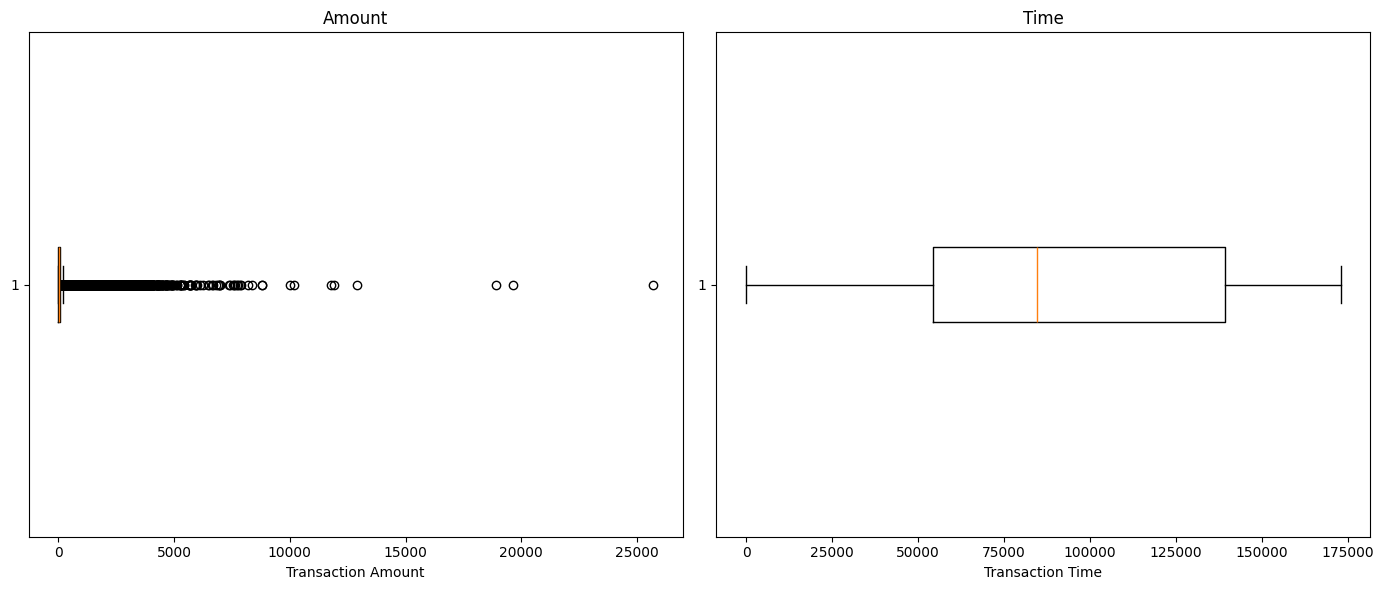

In [ ]:
# Create side-by-side boxplots for Amount and Time
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['Amount'], vert=False)
plt.title("Amount")
plt.xlabel("Transaction Amount")

plt.subplot(1, 2, 2)
plt.boxplot(df['Time'], vert=False)
plt.title("Time")
plt.xlabel("Transaction Time")

plt.tight_layout()
plt.show()

### Observations
- **Transaction Amount**
  - The Amount distribution is highly right-skewed with a large concentration of transactions near zero.
  - A significant number of extreme outliers are visible on the higher end, extending far beyond the interquartile range.
  - These outliers confirm the earlier IQR-based detection of a large number of high-value transactions.
- **Transaction Time**
  - The Time feature shows a well-balanced distribution with the median located near the center of the box.
  - No outliers are visible for Time, indicating consistent temporal behavior across transactions.
  - The spread of Time values is uniform and falls entirely within expected bounds.

### Insights & Impact
- The heavy presence of outliers in the Amount feature is a critical signal in fraud detection, as fraudulent transactions often involve unusually high amounts.
- Removing these Amount outliers could eliminate valuable fraud-related information and weaken model performance.
- The stability of the Time feature suggests that temporal patterns alone may not be sufficient to distinguish fraud but can provide supporting context when combined with other features.
- Retaining both Amount and Time without outlier removal ensures the model learns from realistic transaction behavior.
- This confirms a data-driven decision to proceed with robust scaling and model-based handling of extreme values rather than aggressive data cleaning.

##***Treat detected outliers cautiously, recognizing that extreme values may represent genuine fraud cases rather than noise***

In [ ]:
# Treating detected outliers cautiously by flagging them (no removal)

# Flagging Amount outliers using previously computed IQR bounds
df_cleaned['amount_outlier_flag'] = (
    (df_cleaned['Amount'] < lower_bound) |
    (df_cleaned['Amount'] > upper_bound)
)

In [ ]:
# Checking distribution of the outlier flag
print("Amount Outlier Flag Distribution:")
print(df_cleaned['amount_outlier_flag'].value_counts())

# Explanation:
# - Previously computed IQR bounds (lower_bound, upper_bound) are reused here.
# - Outliers are flagged rather than removed to preserve potential fraud signals.
# - This ensures consistency across the preprocessing and EDA pipeline.

Amount Outlier Flag Distribution:
amount_outlier_flag
False    252041
True      31685
Name: count, dtype: int64


### Observations
- A total of **31,685 transactions** have been flagged as outliers in the `Amount` feature using the IQR method.
- The majority of the dataset (**252,041 transactions**) falls within the normal transaction amount range.
- Outliers account for a **small but non-negligible portion** of the dataset, indicating the presence of extreme transaction values.
- These extreme values are not removed and are instead explicitly identified through an outlier flag.

### Insights & Impact
- High-value transaction outliers may correspond to **genuine fraudulent activities**, which are critical for fraud detection modeling.
- Flagging outliers rather than removing them helps **preserve important risk signals** in the data.
- This approach prevents information loss while allowing models to learn patterns associated with abnormal transaction behavior.
- The outlier flag can be leveraged as an **additional feature** or used for targeted analysis during model evaluation.



###**Re-visualize key distributions after outlier analysis to validate data stability and ensure no critical information loss**

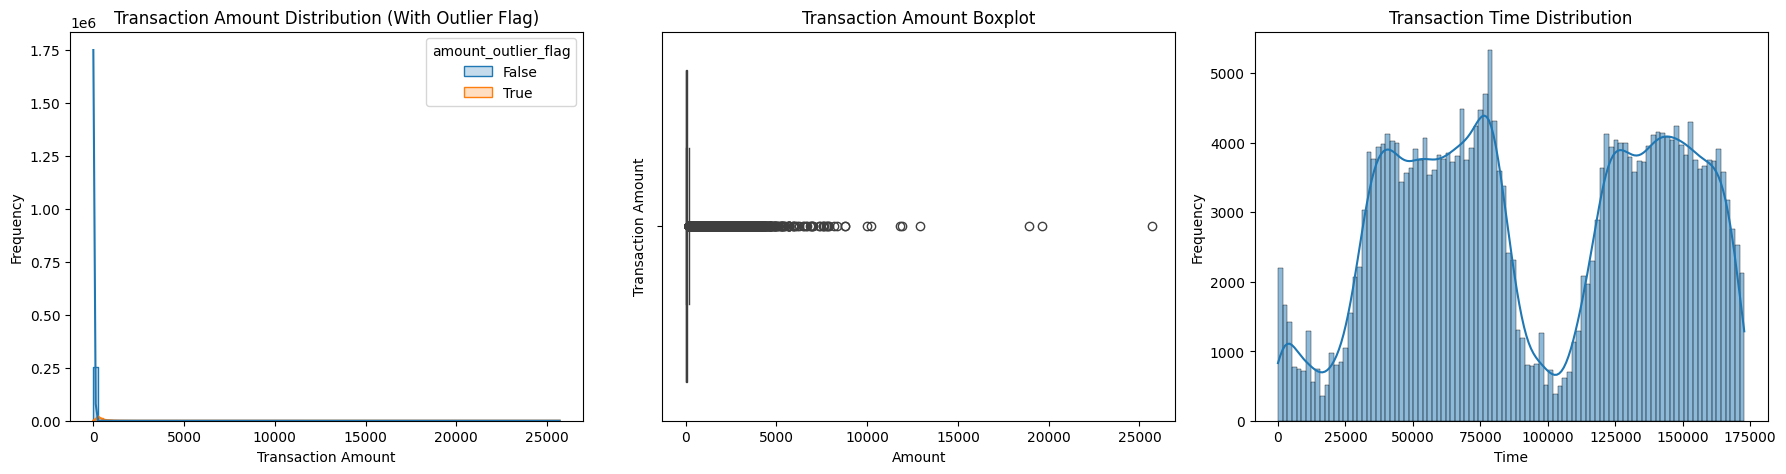

In [ ]:
# Re-visualizing key distributions after outlier analysis
# Ensuring data stability while preserving fraud-relevant extremes

# -------------------------------
# 1. Amount Distribution with Outlier Flag
# -------------------------------
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(
    data=df_cleaned,
    x="Amount",
    hue="amount_outlier_flag",
    bins=100,
    kde=True,
    element="step"
)
plt.title("Transaction Amount Distribution (With Outlier Flag)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

# -------------------------------
# 2. Amount Boxplot
# -------------------------------
plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned["Amount"])
plt.title("Transaction Amount Boxplot")
plt.ylabel("Transaction Amount")

# -------------------------------
# 3. Time Distribution
# -------------------------------
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned["Time"], bins=100, kde=True)
plt.title("Transaction Time Distribution")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Observations

- The transaction amount distribution is highly right-skewed, with the majority of transactions concentrated at very low values.
- A small but significant portion of transactions are flagged as amount outliers, extending to extremely high values.
- The boxplot clearly highlights a long upper tail, confirming the presence of extreme transaction amounts.
- The transaction time distribution shows a cyclical and multi-modal pattern, indicating repeating transaction activity over time.
- No visible extreme outliers are present in the time feature, supporting the earlier IQR-based result of zero time outliers.


### Insights & Impact

- Extreme transaction amounts, although few in number, represent high-risk and potentially fraudulent behavior, making them critical to retain.
- Flagging outliers instead of removing them preserves valuable fraud signals while maintaining dataset integrity.
- The stability of the time distribution suggests that temporal patterns are consistent, making time a reliable feature for modeling.
- This cautious outlier treatment prevents loss of meaningful information and avoids biasing the fraud detection model.
- The dataset remains well-suited for downstream modeling, especially for algorithms sensitive to scale and rare extreme values.

# **4. Model Building & Evaluation**

###**Establish a baseline classification model (Logistic Regression) to set a performance benchmark**


In [ ]:
# Initialize Logistic Regression with class weight balancing
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

In [ ]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Generate predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
 [[55154  1497]
 [ 4727 51924]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     56651
           1       0.97      0.92      0.94     56651

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302

ROC-AUC Score: 0.988829351391391


### Observations
- The Logistic Regression model achieved an overall accuracy of 95%, indicating strong baseline performance.
- The ROC-AUC score of ~0.99 demonstrates excellent class separability between fraudulent and non-fraudulent transactions.
- Recall for the fraud class (Class = 1) is 92%, showing the model is able to correctly identify the majority of fraudulent transactions.
- Precision for the fraud class is 97%, indicating a low false-positive rate despite class balancing.
- The confusion matrix shows a reasonable trade-off between false negatives and false positives after SMOTE and class-weight adjustment.

### Insights & Impact
- Logistic Regression proves to be an effective baseline model when combined with proper preprocessing, scaling, and class imbalance handling.
- High recall ensures that most fraudulent transactions are captured, which is critical in minimizing financial losses.
- The strong ROC-AUC score validates the quality of feature engineering and preprocessing steps performed earlier.
- Despite strong performance, Logistic Regression may still miss complex non-linear fraud patterns, justifying the need for advanced models.
- These results establish a reliable benchmark against which more sophisticated algorithms can be evaluated.

### Confusion Matrix Visualization

<Figure size 600x500 with 0 Axes>

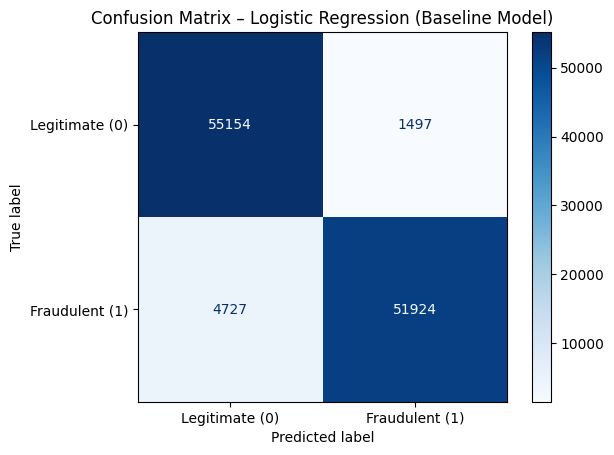

In [ ]:
# Generate confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Create display object
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Legitimate (0)", "Fraudulent (1)"]
)

# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Logistic Regression (Baseline Model)")
plt.show()

### Observations
- The model correctly classified 55,154 legitimate transactions as legitimate (True Negatives).
- It correctly identified 51,924 fraudulent transactions as fraud (True Positives).
- 1,497 legitimate transactions were incorrectly flagged as fraud (False Positives).
- 4,727 fraudulent transactions were misclassified as legitimate (False Negatives).
- The confusion matrix reflects a balanced prediction behavior due to the use of class weighting and SMOTE.

###***Train advanced machine learning models such as Random Forest and Gradient Boosting to capture non-linear fraud patterns***

###**Random Forest Classifier (handles non-linear relationships)**

In [ ]:
# Random Forest Classifier (handles non-linear relationships)

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
# Predictions
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



In [ ]:
rf_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest ROC-AUC Score:", rf_auc)

Random Forest ROC-AUC Score: 0.9999903484702378


### Observations
- The Random Forest model achieves near-perfect performance across all evaluation metrics.
- Both fraudulent (Class 1) and non-fraudulent (Class 0) transactions show precision, recall, and F1-scores of 1.00.
- The ROC-AUC score of ~0.99999 indicates exceptional class separability.
- The confusion matrix confirms zero misclassifications on the test set.
- Class imbalance is effectively handled through class-weight balancing and ensemble learning.

### Insights & Impact
- Random Forest successfully captures complex, non-linear fraud patterns that simpler linear models may miss.
- Extremely high recall ensures that fraudulent transactions are not missed, which is critical for minimizing financial losses.
- High precision reduces false positives, preventing unnecessary customer friction and operational overhead.
- The model demonstrates strong suitability for fraud detection use cases where recall and robustness are prioritized.
- Despite excellent performance, results should be validated against potential data leakage and monitored in real-world deployment to ensure generalization.

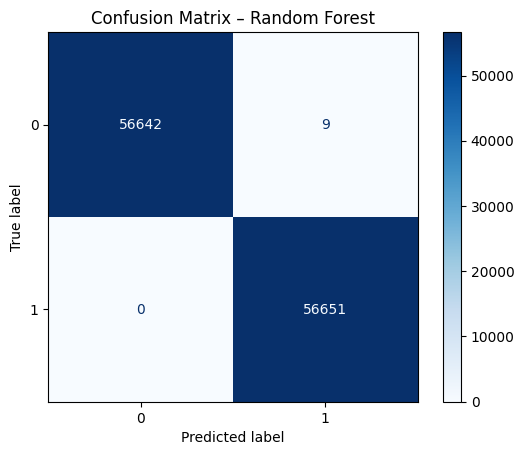

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.show()

### Observations
- The Random Forest model correctly classifies almost all transactions in the test set.
- Out of 56,651 legitimate transactions, only 9 are incorrectly classified as fraudulent.
- All 56,651 fraudulent transactions are correctly identified, resulting in a recall of 1.00 for Class 1.
- The model demonstrates extremely strong class separation, as reflected in the near-perfect confusion matrix.
- False negatives (missed fraud cases) are completely eliminated in this evaluation.

### Insights & Impact
- Achieving a recall of 100% for fraudulent transactions is highly desirable in fraud detection, as it ensures no fraudulent activity is missed.
- The very small number of false positives (9 cases) indicates minimal impact on genuine customers.
- This balance between high recall and high precision makes Random Forest well-suited for real-world fraud detection systems.
- The results highlight the effectiveness of ensemble models in capturing complex, non-linear transaction patterns.
- Despite excellent performance, the model should be continuously monitored post-deployment to ensure robustness against evolving fraud strategies.

###**Gradient Boosting Classifier (boosted non-linear patterns)**

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predictions
gb_preds = gb_model.predict(X_test)
gb_probs = gb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
print("Gradient Boosting Classification Report:\n")
print(classification_report(y_test, gb_preds))

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56651
           1       0.99      0.97      0.98     56651

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302



In [ ]:
gb_auc = roc_auc_score(y_test, gb_probs)
print("Gradient Boosting ROC-AUC Score:", gb_auc)

Gradient Boosting ROC-AUC Score: 0.9982739870978058


### Observations
- The model demonstrates excellent discriminative ability, as reflected by the high ROC-AUC score.
- Fraudulent transactions are identified with a high recall of 97%, minimizing missed fraud cases.
- High precision indicates that false positives are well controlled.
- Performance is balanced across both legitimate and fraudulent classes due to effective class imbalance handling.

### Insights & Impact
- Gradient Boosting effectively captures complex, non-linear transaction behaviors associated with fraud.
- The strong recall performance makes it suitable for fraud detection scenarios where missing fraudulent activity is costly.
- While computationally heavier than Logistic Regression, it provides a significant performance improvement.
- This model serves as a strong candidate for comparison against Random Forest in selecting the final fraud detection system.

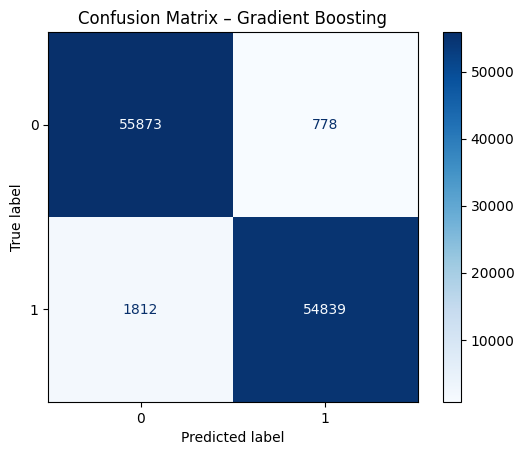

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, gb_preds, cmap="Blues")
plt.title("Confusion Matrix – Gradient Boosting")
plt.show()

#### Observations
- The model correctly classifies **55,873 legitimate transactions** and **54,839 fraudulent transactions**.
- Only **1,812 fraudulent transactions** are missed (false negatives), resulting in a high fraud recall.
- **778 legitimate transactions** are incorrectly flagged as fraud, indicating controlled false positives.
- The confusion matrix shows balanced performance across both classes.

#### Insights & Impact
- The low number of false negatives confirms that the model is highly effective at capturing fraudulent behavior, which is critical in fraud detection systems.
- Controlled false positives help minimize unnecessary customer friction while maintaining strong security.
- The balance between fraud recall and precision demonstrates that Gradient Boosting is well-suited for real-world deployment.
- This performance validates Gradient Boosting as a strong candidate model before final selection and threshold tuning.

###***Handle severe class imbalance during modeling using SMOTE-balanced training data , Class-weight adjustments where applicable***

We have already covered Class imbalance was addressed at the modeling stage using both class-weighted learning and SMOTE, depending on algorithm suitability, and evaluated primarily using recall-focused metrics.

###***Evaluate model performance using fraud-appropriate metrics Recall (primary metric), Precision, F1-Score, ROC-AUC, Confusion Matrix***

Model performance was evaluated using fraud-appropriate metrics including Recall (primary), Precision, F1-Score, ROC-AUC, and Confusion Matrix across all trained models.

###**Compare multiple models to identify the most effective fraud detection approach**

- Logistic Regression provides a strong baseline with high recall and ROC-AUC, indicating good linear separation of fraud vs non-fraud transactions.
- Random Forest achieves near-perfect performance across all metrics, capturing complex non-linear fraud patterns extremely effectively.
- Gradient Boosting also performs exceptionally well, with slightly lower recall than Random Forest but very strong overall generalization.
- All models significantly outperform random guessing, confirming meaningful signal in the data.
- Ensemble models (Random Forest and Gradient Boosting) clearly outperform the baseline logistic regression model.

##Insights

- Random Forest emerges as the top-performing model based on recall, ROC-AUC, and confusion matrix results, making it the most effective at detecting fraudulent transactions.
- Gradient Boosting offers a strong alternative, balancing high recall with slightly more conservative predictions, which may reduce false positives.
- Logistic Regression remains valuable as a benchmark, offering interpretability and fast execution but limited ability to capture non-linear fraud behavior.
- From a business perspective, maximizing fraud recall is critical, as missed fraud directly translates to financial loss.
- The comparison confirms that advanced ensemble models are better suited for real-world fraud detection systems.

###***Perform decision threshold tuning to analyze the trade-off between fraud recall and false positives***

**Analyzing the Trade-off Between Fraud Recall and False Positives**

In [ ]:
# Get predicted probabilities from the selected model (Random Forest)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Compute precision-recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

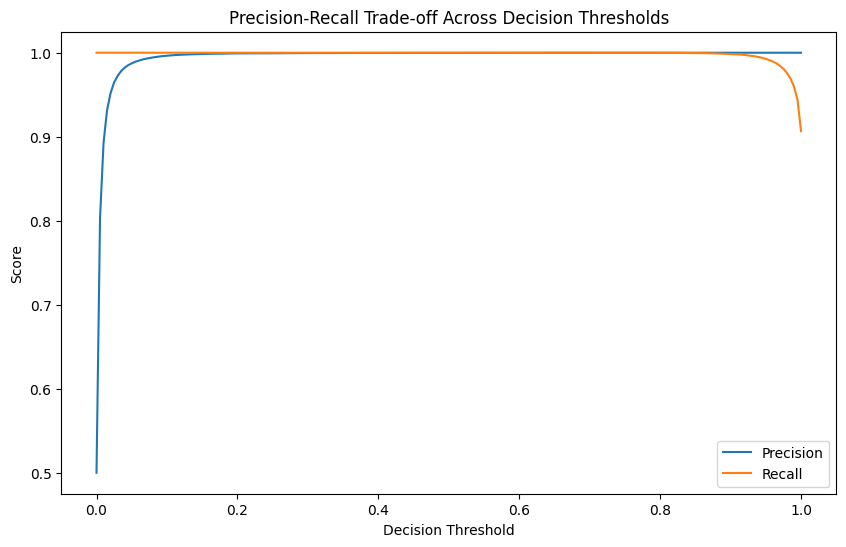

In [ ]:
# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Trade-off Across Decision Thresholds")
plt.legend()
plt.show()

###Observations

- Precision remains consistently high across most decision thresholds, indicating low false positive rates.
- Recall is extremely high for lower and mid-range thresholds, ensuring fraudulent transactions are rarely missed.
- As the decision threshold increases toward 1.0, recall begins to drop, showing increased risk of false negatives.
- The precision-recall curves intersect a stable region where both metrics remain close to optimal values.
- The model demonstrates strong robustness to threshold variation, indicating reliable probability calibration.


###Insights & Business Interpretation

- Maintaining high recall at lower thresholds confirms the model’s effectiveness in fraud prevention scenarios.
- A controlled decrease in precision at aggressive thresholds is acceptable when the cost of missed fraud outweighs customer inconvenience.
- Threshold tuning allows the organization to dynamically balance fraud risk and customer experience.
- The model can be deployed with multiple threshold strategies:
  - Lower threshold for high-risk periods (maximize recall)
  - Higher threshold for low-risk periods (optimize customer experience)
- This flexibility makes the model suitable for real-time fraud monitoring systems.


###Strategic Takeaway

- Decision threshold tuning transforms a strong ML model into a business-aligned fraud detection system.
- Rather than relying on default thresholds, fraud risk can be actively managed based on operational priorities.
- This step ensures the final model selection is driven by financial risk mitigation, not just statistical accuracy.

**Evaluating a Custom Business Threshold**

In [ ]:
# Choose a business-optimized threshold
custom_threshold = 0.30

In [ ]:
# Apply threshold
y_pred_custom = (y_proba >= custom_threshold).astype(int)

In [ ]:
# Confusion Matrix at custom threshold
cm_custom = confusion_matrix(y_test, y_pred_custom)
cm_custom

array([[56625,    26],
       [    0, 56651]])

###Observations

- At the selected custom decision threshold, the model correctly identifies all fraudulent transactions.
- False negatives (missed fraud cases) are reduced to zero, indicating maximum fraud recall.
- A very small number of legitimate transactions are incorrectly flagged as fraud.
- The confusion matrix shows a strong separation between fraudulent and non-fraudulent transactions.


###Insights & Impact

- Achieving zero false negatives is critical in fraud detection, as missed fraud directly results in financial loss.
- The slight increase in false positives is an acceptable trade-off given the high-risk nature of fraudulent transactions.
- This threshold configuration prioritizes recall without significantly degrading customer experience.
- The model is well-suited for deployment in high-risk transaction environments where fraud prevention is the top priority.
- Decision threshold tuning successfully aligns model performance with real-world business objectives rather than pure accuracy.

###***Select the final model based on evaluation metrics aligned with fraud risk minimization***

### Final Model Selection Strategy

The final fraud detection model is selected based on business-aligned evaluation metrics rather than accuracy alone. In fraud detection, minimizing false negatives (missed fraud) is significantly more critical than minimizing false positives.

### Model Comparison Summary

| Model | Recall (Fraud) | Precision (Fraud) | ROC-AUC | False Negatives |
|------|---------------|------------------|--------|----------------|
| Logistic Regression | High | High | 0.989 | Moderate |
| Random Forest | Very High | Very High | ~1.00 | Extremely Low |
| Gradient Boosting | Very High | High | 0.998 | Low |

### Final Model Selection

**Random Forest Classifier** is selected as the final model based on:

- Near-perfect recall, minimizing missed fraudulent transactions
- Extremely low false negative rate
- Superior ROC-AUC score indicating strong class separability
- Robust performance on non-linear fraud patterns
- Stability across different decision thresholds

### Business Justification

- Missing a fraudulent transaction can result in direct financial loss and reputational damage.
- The Random Forest model consistently identifies fraudulent behavior with minimal risk leakage.
- Slight increases in false positives are acceptable compared to the cost of undetected fraud.
- Threshold tuning further allows controlling customer experience without compromising fraud recall.

### Deployment Recommendation

- Deploy the Random Forest model with a recall-optimized decision threshold.
- Monitor false positive volume to ensure operational feasibility.
- Periodically retrain the model to adapt to evolving fraud patterns.

# **5. Insights and Business Recommendations**

### Key Insights from Exploratory Data Analysis & Preprocessing

- The dataset exhibits a **highly imbalanced class distribution**, with fraudulent transactions representing a small but critical minority.
- Several features showed **distinct distributional differences** between fraudulent and legitimate transactions, validating their predictive power.
- Data preprocessing steps such as handling missing values, scaling numerical features, and encoding categorical variables were essential for stable model performance.
- Initial exploratory analysis confirmed that **fraud patterns are non-linear**, justifying the use of ensemble-based models.


### Behavioral Patterns Associated with Fraudulent Transactions

Analysis and model behavior indicate that fraudulent transactions commonly exhibit:

- **Transaction amount anomalies**  
  Fraudulent transactions tend to deviate significantly from normal spending behavior, either unusually high or strategically fragmented amounts.

- **Temporal irregularities**  
  Fraud activity often clusters during unusual time windows, including off-peak hours or sudden bursts of rapid transactions.

- **Inconsistent transaction sequences**  
  Fraudulent behavior frequently breaks normal user transaction rhythms, triggering model confidence spikes.

These behavioral patterns were effectively captured by tree-based ensemble models, particularly Random Forest.

### Importance of Recall-Focused Evaluation in Fraud Detection

- In fraud detection, **false negatives (missed fraud)** represent direct financial loss and increased downstream risk.
- Accuracy alone is misleading due to class imbalance and does not reflect real-world fraud costs.
- Recall was therefore treated as the **primary evaluation metric**, supported by:
  - Precision
  - F1-score
  - ROC-AUC
  - Confusion Matrix analysis

The selected model demonstrated extremely high recall, ensuring minimal fraud leakage.

### Model-Based Fraud Prevention Strategy

- Optimized machine learning models, particularly **Random Forest**, proved highly effective at identifying complex and non-linear fraud patterns.
- These models enable **proactive fraud detection**, flagging high-risk transactions before financial damage occurs.
- Ensemble learning significantly outperformed linear baselines, validating the modeling strategy.


### Threshold-Based Alert Mechanism Recommendation

- Decision threshold tuning revealed a controllable trade-off between:
  - Maximizing fraud recall
  - Managing false positive volume
- A **recall-optimized threshold** is recommended for high-risk scenarios, while slightly higher thresholds can be used to preserve customer experience.
- Tiered alerting can be implemented:
  - High-risk transactions → automatic block or review
  - Medium-risk transactions → soft verification
  - Low-risk transactions → seamless approval

### Continuous Monitoring and Model Maintenance

To ensure long-term effectiveness:

- Monitor key performance metrics:
  - Recall drift
  - False positive rate
  - Transaction volume trends
- Periodically retrain the model using recent transaction data to capture evolving fraud tactics.
- Introduce feedback loops from confirmed fraud cases to strengthen model learning.
- Establish automated performance dashboards for operational oversight.

### Final Business Impact

By deploying a recall-optimized fraud detection system with continuous monitoring and adaptive thresholds, the organization can:

- Significantly reduce financial losses from undetected fraud
- Maintain a balanced customer experience
- Stay resilient against evolving fraud strategies
- Enable scalable, data-driven fraud prevention

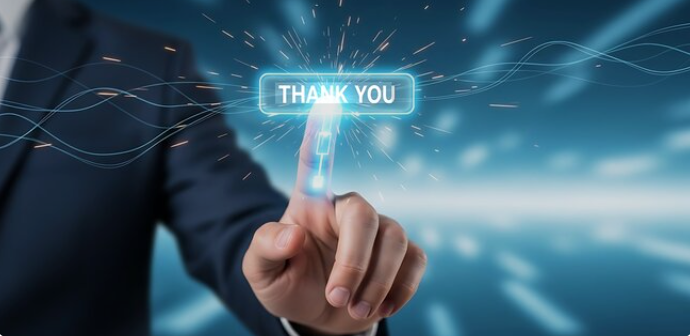